# Упражнение 07 : Тепловая карта

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
con = sqlite3.connect('../data/checking-logs.sqlite')

* анализируйте только пользователей, а не администраторов
* Вы можете выбрать понравившуюся вам цветовую палитру для обоих графиков, которые вам нужно будет нарисовать в этом упражнении
* используйте средство проверки таблиц для вашего запроса
* используйте абсолютные значения коммитов, а не средние значения
* сортируйте фреймы данных по общему количеству коммитов, сделанных пользователем

In [2]:
sql = '''
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.read_sql(sql, con, parse_dates=['timestamp'])

days = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

commits['day'] = commits['timestamp'].apply(lambda x: days[x.dayofweek])
commits['hour'] = commits['timestamp'].dt.hour
commits.drop('timestamp', axis=1, inplace=True)
commits

,uid,day,hour
0,user_4,Fri,5
1,user_4,Fri,5
2,user_4,Fri,5
3,user_4,Fri,5
4,user_4,Fri,5
...,...,...,...
3202,user_1,Thu,20
3203,user_1,Thu,20
3204,user_1,Thu,20
3205,user_1,Thu,20


In [3]:
users = commits.groupby('uid').count().sort_values('hour', ascending=False).index
hours = pd.Index([i for i in range(0, 25, 1)])

In [4]:
day_user = commits.groupby('uid')['day'].value_counts().unstack(0)
day_user = day_user.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
day_user = day_user.reindex(columns=users)
day_user.fillna(0, inplace=True)
day_user

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
day,,,,,,,,,,,,,,,,,,,,,
Mon,35.0,50.0,24.0,14.0,7.0,0.0,23.0,5.0,0.0,46.0,...,8.0,10.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0
Tue,86.0,87.0,131.0,44.0,9.0,1.0,0.0,0.0,16.0,11.0,...,4.0,5.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0
Wed,33.0,0.0,32.0,15.0,0.0,34.0,8.0,0.0,37.0,0.0,...,1.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0
Thu,108.0,17.0,4.0,40.0,78.0,51.0,96.0,7.0,77.0,7.0,...,17.0,14.0,15.0,5.0,2.0,0.0,0.0,2.0,6.0,0.0
Fri,61.0,0.0,0.0,10.0,10.0,2.0,7.0,35.0,1.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sat,0.0,79.0,31.0,66.0,21.0,16.0,3.0,90.0,4.0,3.0,...,32.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
Sun,45.0,26.0,13.0,44.0,51.0,69.0,28.0,7.0,2.0,8.0,...,0.0,31.0,27.0,20.0,9.0,8.0,0.0,1.0,0.0,0.0


In [5]:

hour_user = commits.groupby('uid').hour.value_counts().unstack(0)
hour_user = hour_user.reindex(index=hours, fill_value=0)
hour_user = hour_user.reindex(columns=users)
hour_user = hour_user.rename_axis('hour')
hour_user = hour_user.fillna(0)
hour_user

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.0,6.0,0.0,0.0,10.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,9.0,6.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


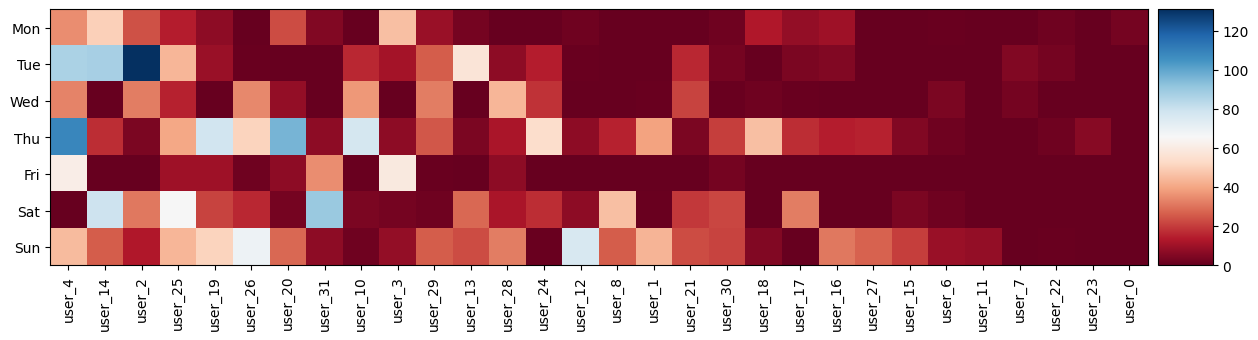

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))

im = ax.imshow(day_user, cmap='RdBu')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax)
ax.set_xticks([i for i in range(0, len(day_user.columns), 1)])
ax.set_xticklabels(day_user.columns, rotation=90)
ax.set_yticks([i for i in range(0, len(day_user.index), 1)])
ax.set_yticklabels(day_user.index)
plt.show()

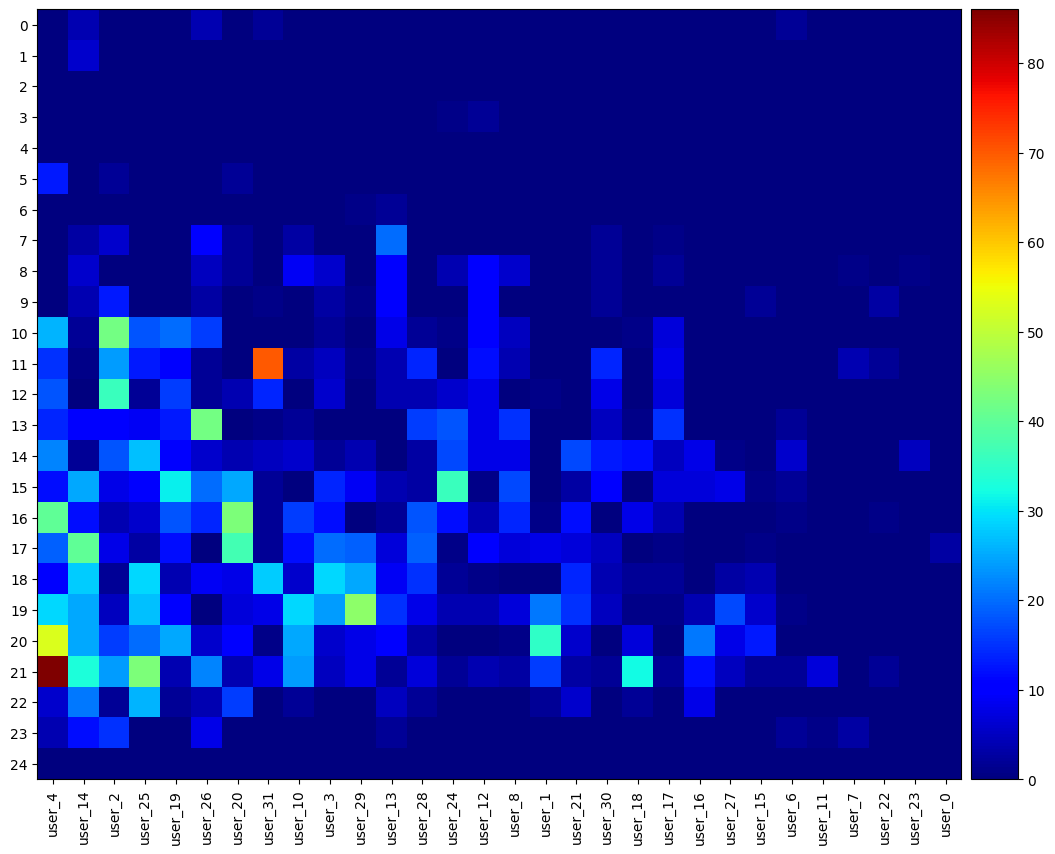

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(hour_user, cmap='jet')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax)
ax.set_xticks([i for i in range(0, len(hour_user.columns), 1)])
ax.set_xticklabels(hour_user.columns, rotation=90)
ax.set_yticks([i for i in range(0, len(hour_user.index), 1)])
ax.set_yticklabels(hour_user.index)
plt.show()

In [8]:
con.close()

# в конце вашего блокнота Jupyter создайте ячейку с кодом и вставьте вопросы (ответьте на них, глядя только на графики):

* «У какого пользователя больше всего коммитов во вторник?» Ответ: user_*.

user_2

* «У какого пользователя больше всего коммитов в четверг?» Ответ: user_*.

user_4

* «В какой день недели пользователи не любят делать много коммитов?» Ответ, например: понедельник.

Пятница

* «Какой пользователь в какой час сделал наибольшее количество коммитов?» Ответ, например: user_1, 15

user_4, 21